In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
legitimate_urls = pd.read_csv("C:/Users/HP/Downloads/PhishingDetectionWebpage/PhishingDetectionWebpage/dataset/legitimate-urls.csv")

In [3]:
phishing_urls = pd.read_csv("C:/Users/HP/Downloads/PhishingDetectionWebpage/PhishingDetectionWebpage/dataset/phishing-urls.csv")

In [4]:
legitimate_urls.head(5)

,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic
0,www.liquidgeneration.com,0,0,/,0,http,0,0,0,0,0,1,0,0,0,0,2
1,www.onlineanime.org,0,0,/,0,http,0,0,0,0,0,1,0,0,1,0,1
2,www.ceres.dti.ne.jp,0,0,/~nekoi/senno/senfirst.html,0,http,0,1,0,1,0,1,0,0,0,0,0
3,www.galeon.com,0,0,/kmh/,0,http,0,0,0,0,0,0,0,0,0,0,0
4,www.fanworkrecs.com,0,0,/,0,http,0,0,0,1,1,1,0,0,1,0,1


In [5]:
phishing_urls.head(5)

,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic
0,asesoresvelfit.com,0,0,/media/datacredito.co/,0,http,0,0,0,0,0,1,0,1,0,1,1
1,caixa.com.br.fgtsagendesaqueconta.com,0,0,/consulta8523211/principal.php,0,http,0,1,1,0,0,1,0,1,1,0,1
2,hissoulreason.com,0,0,/js/homepage/home/,0,http,0,0,0,0,0,1,0,1,0,0,1
3,unauthorizd.newebpage.com,0,0,/webapps/66fbf/,0,http,0,0,0,0,0,1,0,1,1,0,1
4,133.130.103.10,0,1,/23/,0,http,0,2,0,1,0,1,0,1,0,0,1


In [6]:
#Combining both dataset
urls = legitimate_urls.append(phishing_urls)
urls.head(5)

C:\Windows\Temp\ipykernel_8\1386464123.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  urls = legitimate_urls.append(phishing_urls)


,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic
0,www.liquidgeneration.com,0,0,/,0,http,0,0,0,0,0,1,0,0,0,0,2
1,www.onlineanime.org,0,0,/,0,http,0,0,0,0,0,1,0,0,1,0,1
2,www.ceres.dti.ne.jp,0,0,/~nekoi/senno/senfirst.html,0,http,0,1,0,1,0,1,0,0,0,0,0
3,www.galeon.com,0,0,/kmh/,0,http,0,0,0,0,0,0,0,0,0,0,0
4,www.fanworkrecs.com,0,0,/,0,http,0,0,0,1,1,1,0,0,1,0,1


In [7]:
urls.shape[1]

17

In [8]:
urls.columns

Index(['Domain', 'Having_@_symbol', 'Having_IP', 'Path',
       'Prefix_suffix_separation', 'Protocol', 'Redirection_//_symbol',
       'Sub_domains', 'URL_Length', 'age_domain', 'dns_record',
       'domain_registration_length', 'http_tokens', 'label',
       'statistical_report', 'tiny_url', 'web_traffic'],
      dtype='object')

In [9]:
urls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 0 to 975
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Domain                      1975 non-null   object
 1   Having_@_symbol             1975 non-null   int64 
 2   Having_IP                   1975 non-null   int64 
 3   Path                        1832 non-null   object
 4   Prefix_suffix_separation    1975 non-null   int64 
 5   Protocol                    1975 non-null   object
 6   Redirection_//_symbol       1975 non-null   int64 
 7   Sub_domains                 1975 non-null   int64 
 8   URL_Length                  1975 non-null   int64 
 9   age_domain                  1975 non-null   int64 
 10  dns_record                  1975 non-null   int64 
 11  domain_registration_length  1975 non-null   int64 
 12  http_tokens                 1975 non-null   int64 
 13  label                       1975 non-null   int64

In [10]:
#Preprocessing - Removing Unnecessary columns
urls = urls.drop(urls.columns[[0,3,5]],axis=1)
print('Number of missing values in dataset')
print(urls.isnull().sum().sum())

Number of missing values in dataset
0


In [11]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
urls = urls.sample(frac=1).reset_index(drop=True)

In [12]:
#Removing class variable from the dataset
urls_without_labels = urls.drop('label',axis=1)
urls_without_labels.columns

Index(['Having_@_symbol', 'Having_IP', 'Prefix_suffix_separation',
       'Redirection_//_symbol', 'Sub_domains', 'URL_Length', 'age_domain',
       'dns_record', 'domain_registration_length', 'http_tokens',
       'statistical_report', 'tiny_url', 'web_traffic'],
      dtype='object')

In [13]:
labels = urls['label']

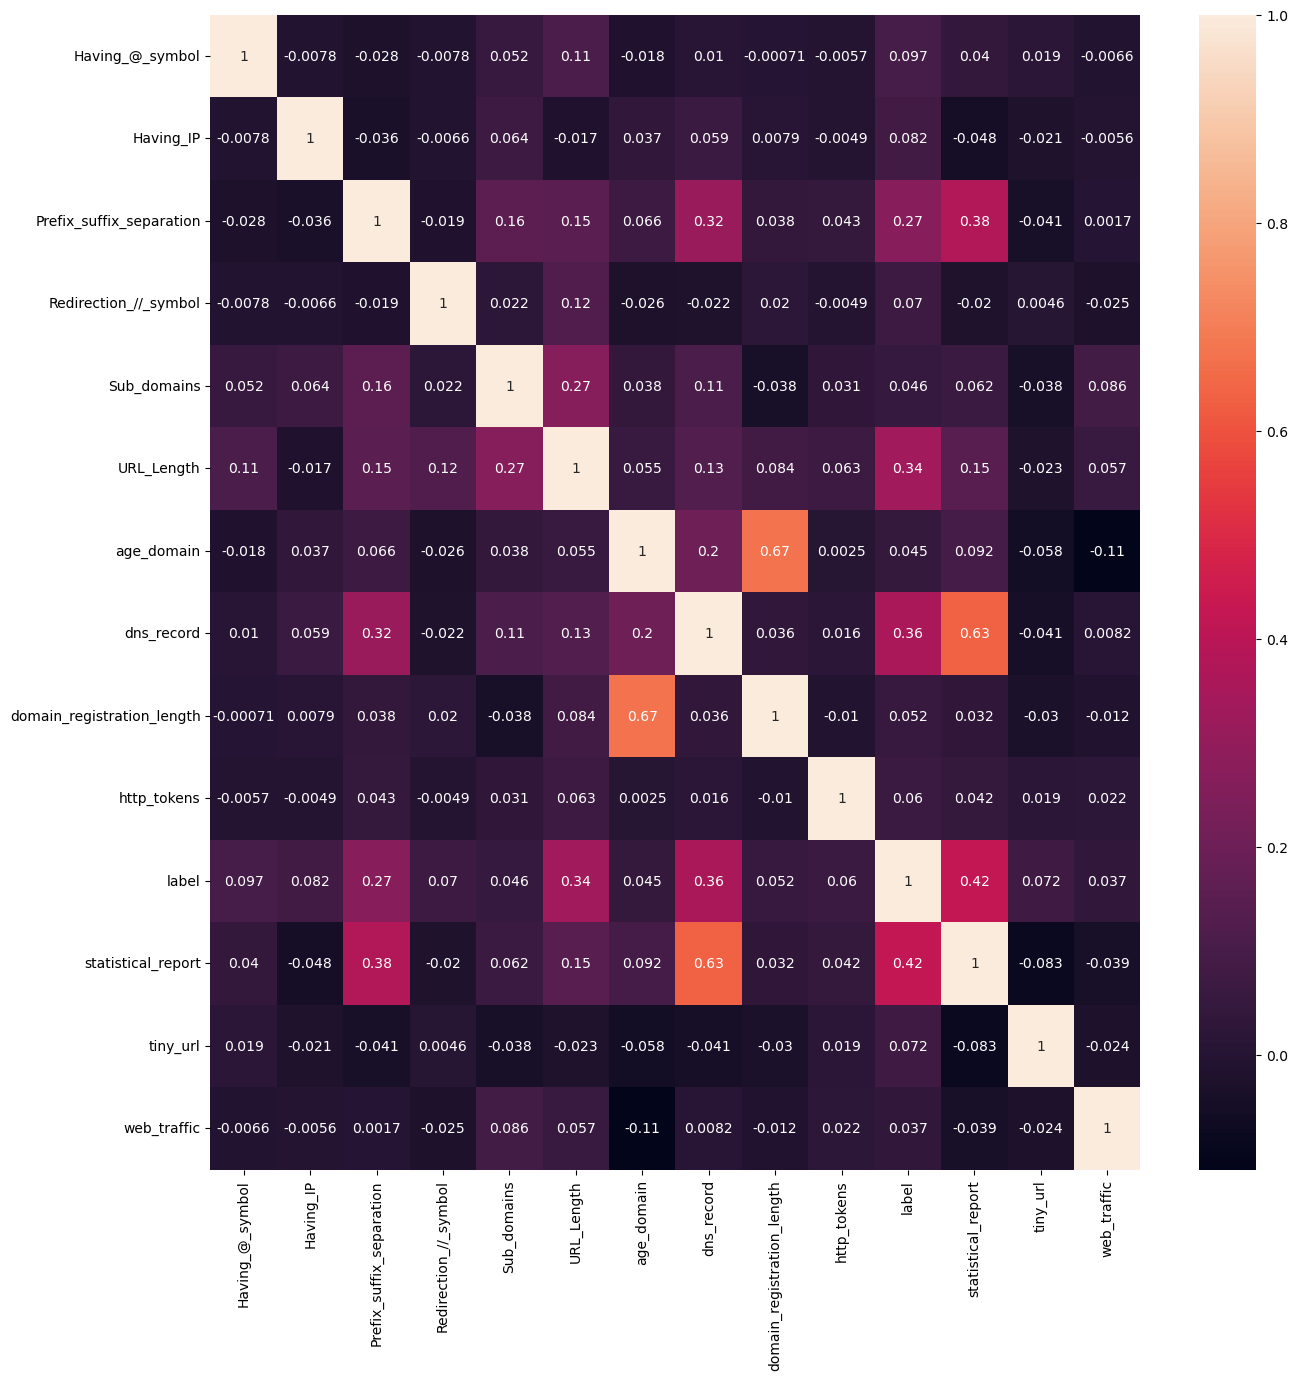

In [14]:
#Correlation heatmap
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(urls.corr(), annot=True)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(urls_without_labels, labels, test_size=0.30, random_state=110)
print(len(x_train),len(x_test),len(y_train),len(y_test))

1382 593 1382 593


In [16]:
y_train.value_counts()

0    706
1    676
Name: label, dtype: int64

In [17]:
y_test.value_counts()

1    300
0    293
Name: label, dtype: int64

In [21]:

from sklearn import metrics

In [22]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [23]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(x_train)
y_test_gbc = gbc.predict(x_test)

In [24]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))


Gradient Boosting Classifier : Accuracy on training Data: 0.864
Gradient Boosting Classifier : Accuracy on test Data: 0.853

Gradient Boosting Classifier : f1_score on training Data: 0.854
Gradient Boosting Classifier : f1_score on test Data: 0.848

Gradient Boosting Classifier : Recall on training Data: 0.811
Gradient Boosting Classifier : Recall on test Data: 0.810

Gradient Boosting Classifier : precision on training Data: 0.901
Gradient Boosting Classifier : precision on test Data: 0.890


In [27]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       293
           1       0.89      0.81      0.85       300

    accuracy                           0.85       593
   macro avg       0.86      0.85      0.85       593
weighted avg       0.86      0.85      0.85       593



In [45]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

In [28]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(x_train,y_train)

GaussianNB()

In [30]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(x_train)
y_test_nb = nb.predict(x_test)

In [31]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.535
Naive Bayes Classifier : Accuracy on test Data: 0.519

Naive Bayes Classifier : f1_score on training Data: 0.098
Naive Bayes Classifier : f1_score on test Data: 0.095

Naive Bayes Classifier : Recall on training Data: 0.052
Naive Bayes Classifier : Recall on test Data: 0.050

Naive Bayes Classifier : precision on training Data: 0.972
Naive Bayes Classifier : precision on test Data: 1.000


In [33]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_nb))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67       293
           1       1.00      0.05      0.10       300

    accuracy                           0.52       593
   macro avg       0.75      0.53      0.38       593
weighted avg       0.76      0.52      0.38       593



In [46]:

#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

In [35]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [36]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(x_train)
y_test_svc = svc.predict(x_test)

In [37]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))


Support Vector Machine : Accuracy on training Data: 0.809
Support Vector Machine : Accuracy on test Data: 0.811

Support Vector Machine : f1_score on training Data: 0.791
Support Vector Machine : f1_score on test Data: 0.798

Support Vector Machine : Recall on training Data: 0.741
Support Vector Machine : Recall on test Data: 0.737

Support Vector Machine : precision on training Data: 0.849
Support Vector Machine : precision on test Data: 0.870


In [38]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       293
           1       0.87      0.74      0.80       300

    accuracy                           0.81       593
   macro avg       0.82      0.81      0.81       593
weighted avg       0.82      0.81      0.81       593



In [47]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

In [50]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [51]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Gradient Boosting Classifier,0.853,0.848,0.811,0.901
1,Naive Bayes Classifier,0.519,0.095,0.052,0.972
2,Support Vector Machine,0.811,0.798,0.741,0.849


In [53]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [54]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Gradient Boosting Classifier,0.853,0.848,0.811,0.901
1,Support Vector Machine,0.811,0.798,0.741,0.849
2,Naive Bayes Classifier,0.519,0.095,0.052,0.972


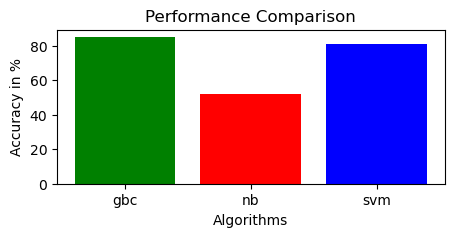

In [55]:

from matplotlib import pyplot as plt2
# x-coordinates of left sides of bars  
left = [1,2,3] 
  
# heights of bars 
height = [85,52,81] 
  
# labels for bars 
tick_label = ['gbc','nb','svm'] 
  
# plotting a bar chart 
plt2.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = [ 'green','red','blue']) 
  
# naming the x-axis 
plt2.xlabel('Algorithms') 
# naming the y-axis 
plt2.ylabel('Accuracy in %') 
# plot title 
plt2.title('Performance Comparison') 
  
# function to show the plot 
plt2.rcParams['figure.figsize'] = (5,2)
plt2.show()


In [ ]:
urls.drop_duplicates()

In [37]:
urls.to_csv("correct.csv")